### **Welcome to the 2nd (short) assignment of CS-587!**

The aim of this assignment is to get familiar with (a) the Tensorflow framework, and, (b) computational graphs and the information flow (forward, backward operation)!

Before this assignment:
- Read the 2nd tutorial slides found in [here](https://docs.google.com/presentation/d/1fAoPGhpYGk6hJibHCCXz5VmruLcTOtztU9wP2VZ1DNI/edit?usp=sharing)

What you need to submit:

a) This .ipynb or .py file

b) A report (.pdf) with the requested tasks.



**Quick check on what you have installed** 

In [1]:
import sys
print("Python version:", sys.version)

import tensorflow as tf
print("TensorFlow version:", tf.__version__) #1.15

Python version: 3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 21:41:56) 
[GCC 7.3.0]
TensorFlow version: 1.15.0


# **Part - 1: Basic TF operations**



## Examples:

Constants

In [2]:
# Basic constant operations
# The value returned by the constructor represents the output
# of the Constant op.
a = tf.constant(2)
b = tf.constant(3)

# Launch the default graph.
with tf.Session() as sess:
    print("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print ("Addition with constants: %i" % sess.run(a+b))
    print ("Multiplication with constants: %i" % sess.run(a*b))

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


Placeholders

In [4]:
## Example 1: simple placeholder "feeding"

# Define a placeholder that expects a vector of three floating-point values,
# and a computation that depends on it.
x = tf.placeholder(tf.float32, shape=[3])
y = tf.square(x)

with tf.Session() as sess:
  # Feeding a value changes the result that is returned when you evaluate `y`.
  print(sess.run(y, {x: [1.0, 2.0, 3.0]}))  # => "[1.0, 4.0, 9.0]"
  print(sess.run(y, {x: [0.0, 0.0, 5.0]}))  # => "[0.0, 0.0,25.0]"


[1. 4. 9.]
[ 0.  0. 25.]


In [3]:
## Example 2:  Basic operations with placeholders

a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

# Define some operations
add = tf.add(a, b)
mul = tf.multiply(a, b)
sub = tf.subtract(a,b)

# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print ("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print ("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 4, b: 3}))
    print ("Substract with variables: %i" % sess.run(sub, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 12
Substract with variables: -1


## **Assignment:**

The goal is to define a linear regression model using TF operations, variables and placeholders. 


**Tasks**:
- Define the weights and biases as variables with float32 format. Initialize the weight with 0.3 and the bias with -0.3
- Define the x, y as placeholders with float32 format
Q.1: Why do we use this formulation?
- Define the model operation y = w*x+b

- Define the loss (quadratic loss between model output and expected value). 
- Map some input-output data to your model tf.placeholders (x,y) so that we can evaluate the model.

For this assignment you are allowed to use the functions:
tf.mul, tf.add, tf.square and tf.reduce_sum 

As well as any other function in the tf framework that suits your needs.
  

In [6]:
####################################################
# TASK: Define the variables weights W and biases b
###################################################
#W = pass
#b = pass
W =  tf.Variable(0.3, dtype=tf.float32)
b =  tf.Variable(-0.3, dtype=tf.float32)

####################################################
# TASK: Define inputs and outputs
###################################################
#x = pass
#y = pass
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

####################################################
# TASK: Define the model
####################################################
#Model = pass
Model = tf.add(tf.multiply(W,x),b)

####################################################
# TASK: Define the loss: Quadratic loss in our case
####################################################
#loss = pass
loss = tf.reduce_sum(tf.square(Model - y))                   

#Define an array to store the loss
loss_arr = []

#Start an optimizer to minimize loss and estimate the values of W and b that best approximate 
# the ground-truth output

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

#Initialize variables
init = tf.global_variables_initializer()

# Start a session and actually do the initialization
sess = tf.Session()

sess.run(init)

#And now lets run our model - for 10 iterations
for i in range(10):
    
    ###############################################################################
    # TASK:
    # -add inside the brackets the values for x, y for which we need to evaluate our model
    #   values  x = 1, 2, 3, 4, y = 0, -1, -2, -3
    ##############################################################################
    #_, lossy = sess.run([train, loss], { })
    _, lossy = sess.run([train, loss], {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
    
    loss_arr.append(lossy) # store the loss values
  
# And now let's evaluate the variables (W,b)
print(sess.run([W,b]))

[-0.5291639, -0.3842745]


<function matplotlib.pyplot.show>

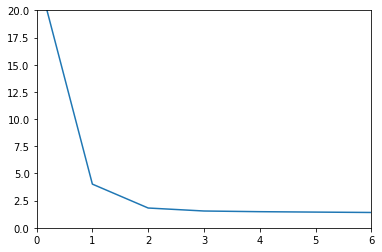

In [7]:
# And now let's see how the loss behaves
import matplotlib.pyplot  as plt

plt.plot(loss_arr)
plt.axis([0, 6, 0, 20])
plt.show

# **Part - 2: Computational graphs and custom gradients**

> Read before doing this part:

[tf.custom_gradient](https://www.tensorflow.org/api_docs/python/tf/custom_gradient)





## Example: Defining a custom gradient 
- Specify the forward and backward operations for f(x) = log(1+e^x)

In [8]:
# Define our input
x = tf.constant(10.)

# Notify tf that we will be defining the forward and backward operations
@tf.custom_gradient # The @ is called a decorator, it is similar as writing tf.custom_gradient(log1pexp) 
def log1pexp(x):
  # Forward operation
  e = tf.exp(x)
  f_x = tf.math.log(1 + e)
  
  # Backward operation
  def grad(upstream): 
    return upstream * (1 - 1 / (1 + e))
  return f_x, grad

# Let TF know that we are tracking the specific operation forward and backward 
with tf.GradientTape(persistent=True) as tape: # it is like a keyword assignment for this process. Alternatively we could just have written
# it as tf.GradientTanpe.watch(x)
  tape.watch(x)
  # Call forward-backward function here to define the operations for y
  f_x = log1pexp(x)

# Call the operation  
Gradient = tape.gradient(f_x, x)

# Session: An object that encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated
sess = tf.Session()
with sess.as_default():

  # Add print operation
  sess.run(tf.print("The value of f(x) is:", f_x))
  # Add print operation
  sess.run(tf.print("The gradient df/dx is: ", Gradient))

The value of f(x) is: 10.0000458
The gradient df/dx is:  0.999954581


- Define the forward pass of function $f(x) = x^2+1$, and the 1st, 2nd order derivatives

In [9]:
x = tf.constant(10.)

@tf.custom_gradient
def op(x):
  y = x*x+1
  @tf.custom_gradient
  def grad_fn(dy):
    gdy = 2*x
    def grad_grad_fn(ddy):  # Not the 2nd order gradient of op w.r.t. x.
      return 2
    return gdy, grad_grad_fn
  return y, grad_fn

  # Let TF know that we are tracking the specific operation forward and backward 
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  # Call forward-backward function here to define the operations for y
  f_x = op(x)

# Call the operation  
Gradient = tape.gradient(f_x, x)

# Session: An object that encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated
sess = tf.Session()
with sess.as_default():

  # Add print operation
  sess.run(tf.print("The value of f(x) is:", f_x))
  # Add print operation
  sess.run(tf.print("The gradient df/dx is: ", Gradient))

The value of f(x) is: 101
The gradient df/dx is:  20


## **Assignment:**

Part 2a.A:
  - **Question**: What is the functionality of upstream? Answer it in your report.

Part 2a.B: 
  - Implement the following functions and the requested tasks

 **One-variable function:**

$y(x) = \frac{\sin x}{x}$, derivative is $\frac{dy}{dx}=$ ????

1. Design the computational graph (in your report)
2. Compute the derivative for the back propagation process by hand (include the computations in your report)
3.  Compute the forward operation and the corresponding backward operation
using tf.custom_gradient()

In [11]:
############################
# TODO: 
# - define forward pass
# - define gradient 
###############################
import sys
@tf.custom_gradient
def sinx_underx(x):
    ################################
    # CODE START f(x)              #
    ################################
    
    #func_fx = pass
    func_fx = tf.sin(x)/x
    
    ################################
    # CODE END                     #
    ################################
    def grad(upstream):
        ################################
        # CODE START f'(x)              #
        ################################
        
        #grad_result = pass
        grad_result = upstream *((x * tf.cos(x) - tf.sin(x) )/ (x*x))
        
        ################################
        # CODE END                     #
        ################################
        return upstream * (grad_result)
    return func_fx, grad

# Evaluate it with x = 10
x = tf.constant(10.)

# Let TF know that we are tracking the specific operation forward and backward 
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  # Call forward-backward function here to define the operations for y
  y = sinx_underx(x)

# Call the operation  
Gradient = tape.gradient(y, x)

# Session: An object that encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated
sess = tf.Session()
with sess.as_default():
    
    ################################
    # CODE START                  #
    ################################
 
    #############################################################
    # TODO: print the value of dy/dx, expected dy/dx = -0.07846694
    ############################################################## 
    #pass
    sess.run(tf.print("The gradient df/dx is: ", Gradient))
    #########################################################
    # TODO: print the value of y, expected is y = -0.054402113
    ########################################################
    #pass
    sess.run(tf.print("The value of y is: ", y))
    ################################
    # CODE END                     #
    ################################

The gradient df/dx is:  -0.0784669369
The value of y is:  -0.054402113


**Two-variable function**:

$$f(x,y) = a x^2 +b xy + c y^2$$

1. Design the computational graph by hand (include it in your report, also include the partial derivatives df/dx, df/dy)
2. Compute the forward operation and the corresponding backward operation
using tf.custom_gradient()

In [14]:
@tf.custom_gradient
def bar(x, y):
  a = 1.0
  b= 4.0 
  c = 3.0

  ################################
  # CODE START f(x,y)            #
  ################################
  #f = pass
  f = a * x * x + b * x * y + c * y * y

  ################################
  # CODE END                     #
  ################################
  
  def grad(upstream):
    ################################
    # CODE START df/dx, df/dy      #
    ################################
    
    #df_dx = pass
    #df_dy = pass
    df_dx = 2 * a * x + b * y
    df_dy = x * b + 2 * y * c
    
    ################################
    # CODE END                     #
    ################################
    return upstream * df_dx, upstream * df_dy
 
  return f, grad

# Evaluate on values:  
x = tf.constant(2.0, dtype=tf.float32)
y = tf.constant(3.0, dtype=tf.float32)
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x)
  tape.watch(y)
  f = bar(x, y)

# Get the gradient - expected is 16
Gradient_x = tape.gradient(f, x)
# Add print operation
sess.run(tf.print("The gradient df/dx is: ", Gradient_x))

# Get the gradient y - expected is 14
Gradient_y = tape.gradient(f, y)

# Add print operation
sess.run(tf.print("The gradient df/dy is: ", Gradient_y))

The gradient df/dx is:  16
The gradient df/dy is:  26


**Second-order derivative**:

For the function $f(x) = \log(1+e^{x})$
0. Design the computational graph (include it in your report).
1. Define the forward pass
2. Define the operations that compute the 1st derivative f'(x)
3. Define the operations that compute the 2nd derivative f''(x)

Evaluate for x = 10, and print the results!

In [12]:
################################
# CODE START                   #
################################

# pass

#references: https://docs.w3cub.com/tensorflow~1.15/gradienttape
#            https://www.tensorflow.org/api_docs/python/tf/custom_gradient
    
x = tf.constant(10.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  with tf.GradientTape(persistent=True) as gg:
    gg.watch(x)
    y = tf.math.log(1 + tf.exp(x))
  dy_dx = gg.gradient(y, x)
d2y_dx2 = g.gradient(dy_dx, x)

sess.run(tf.print("dy/dx: ", dy_dx))
sess.run(tf.print("d^2y/dx^2", d2y_dx2)) #printed in floating point arithmetic

################################
# CODE END                     #
################################

dy/dx:  0.999954641
d^2y/dx^2 4.53546054e-05
